In [1]:
import sys
sys.path.insert(0, "../../python")

import os
import numpy as np
from vsim import plot
from vsim import load
from vsim import analyze
import matplotlib.pyplot as plt

path = '/media/robert/Data_Storage/VSim/Matched-Accelerating-Gradient/Witness_Beam_Distance/10e17PlasmaDensity/500um/'
simName = 'AccelGradient'

In [ ]:
params = {'drive' : 'rhoDrive',
          'witness' : 'rhoWitness',
          'plasma' : 'electrons',
          'dumpInd' : 6,
          'path' : path,
          'simName' : simName,
          'zoom' : 4.0,
          'alphaCutoff' : .05
          }
plot.drive_witness_density(params)

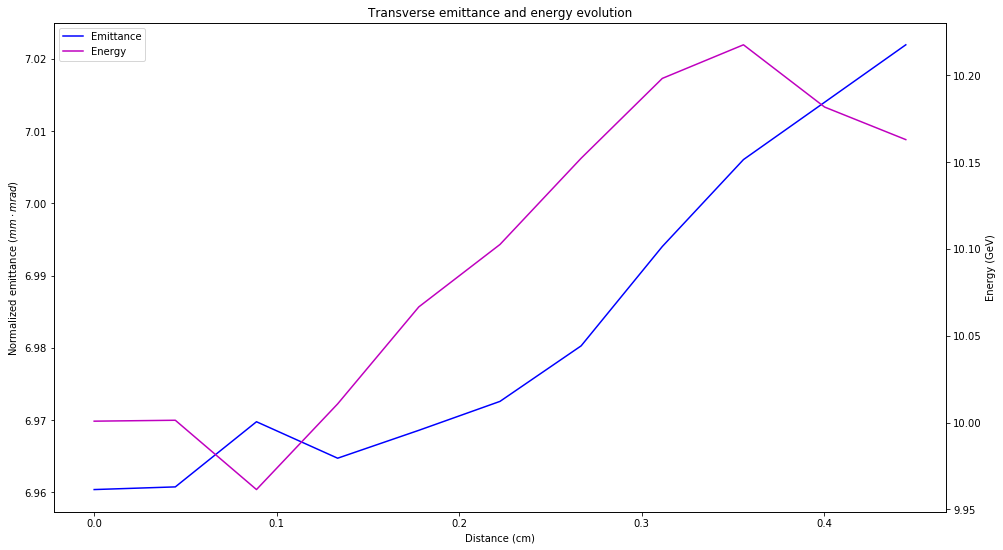

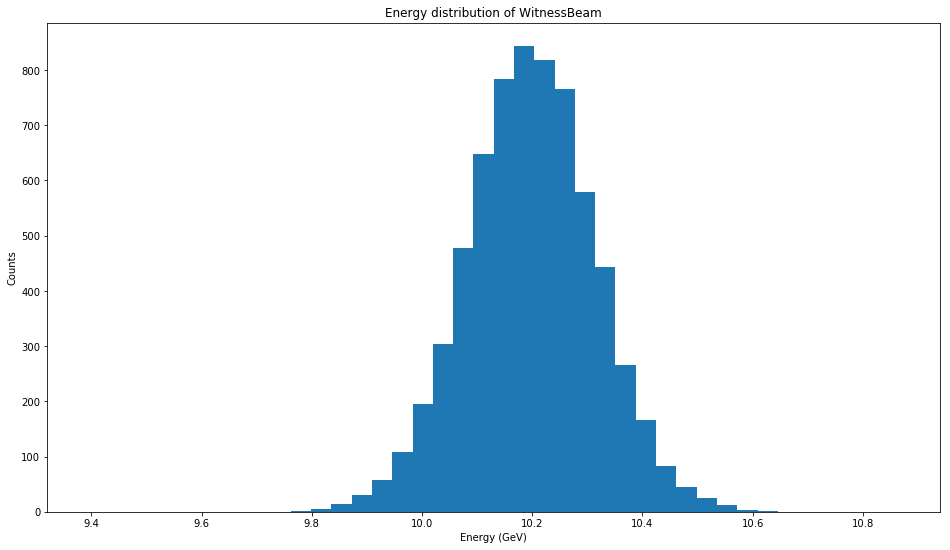

(d, e): ( 0.0 , 10.000772377 )
(d, e): ( 0.0444632433152 , 10.0012966086 )
(d, e): ( 0.0889264866303 , 9.9614016228 )
(d, e): ( 0.133389729946 , 10.0107213018 )
(d, e): ( 0.177852973261 , 10.0665524367 )
(d, e): ( 0.222316216576 , 10.1024840557 )
(d, e): ( 0.266779459891 , 10.152125128 )
(d, e): ( 0.311242703206 , 10.1980839795 )
(d, e): ( 0.355705946521 , 10.2174270509 )
(d, e): ( 0.400169189836 , 10.1815790659 )
(d, e): ( 0.444632433152 , 10.1628521321 )
grad:  106.462029799 GeV/m
std:  0.115974671129 GeV


In [6]:
params = {'species' : 'WitnessBeam',
          'path' : path,
          'simName' : simName,
          'Nt' : 10,
          'mass' : 0.511e-3
          }
d, e = plot.emittance_energy(params)
params['dumpInd'] = 7
params['bins'] = 40
plot.energy_distribution(params)
for i in range(len(d)):
    print('(d, e): (', d[i], ',', e[i], ')')
pFile = plot.get_filename(path, simName, params['species'], params['dumpInd'])
pData = load.get_species_data(pFile, params['species'])
weights = analyze.get_weights(pData)
energy = analyze.get_ptc_energy(pData, params['mass'])
average = np.average(energy, weights=weights)
var = np.average((energy-average)**2, weights=weights)
std = np.sqrt(var)
gradient = (e[7]-e[2]) / (d[7]-d[2]) *100
print('grad: ', gradient, 'GeV/m')
print('std: ', std, 'GeV')